<a href="https://colab.research.google.com/github/Urvi1006/Cattle-Disease-Prediction-Using-ML/blob/main/SVMcode_for_cattle_predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = []
y = []
image_size = 150

In [ ]:
healthy_folder = '/content/drive/MyDrive/PROJECT1/healthycows'
diseased_folder = '/content/drive/MyDrive/PROJECT1/lumpycows'


In [ ]:
for img_name in os.listdir(healthy_folder):
    img = cv2.imread(os.path.join(healthy_folder, img_name))
    if image_size:
        img = cv2.resize(img, (image_size, image_size))
    X.append(img.flatten())  # Flatten the image
    y.append(0)  # 0 for healthy


In [ ]:
for img_name in os.listdir(diseased_folder):
    img = cv2.imread(os.path.join(diseased_folder, img_name))
    if image_size:
        img = cv2.resize(img, (image_size, image_size))
    X.append(img.flatten())  # Flatten the image
    y.append(1)  # 1 for diseased

In [ ]:
X = np.array(X)
y = np.array(y)

# Shuffle the data
X, y = shuffle(X, y, random_state=101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data augmentation using RandomOverSampler
X_train_resampled, y_train_resampled = RandomOverSampler().fit_resample(X_train, y_train)


In [ ]:
model = SVC(kernel='linear', C=1)  # You can adjust the kernel and C parameter

# Train the model
model.fit(X_train_resampled, y_train_resampled)

SVC(C=1, kernel='linear')

Accuracy: 0.5957446808510638
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.56      0.60        52
           1       0.54      0.64      0.59        42

    accuracy                           0.60        94
   macro avg       0.60      0.60      0.60        94
weighted avg       0.61      0.60      0.60        94

Confusion Matrix:
 [[29 23]
 [15 27]]


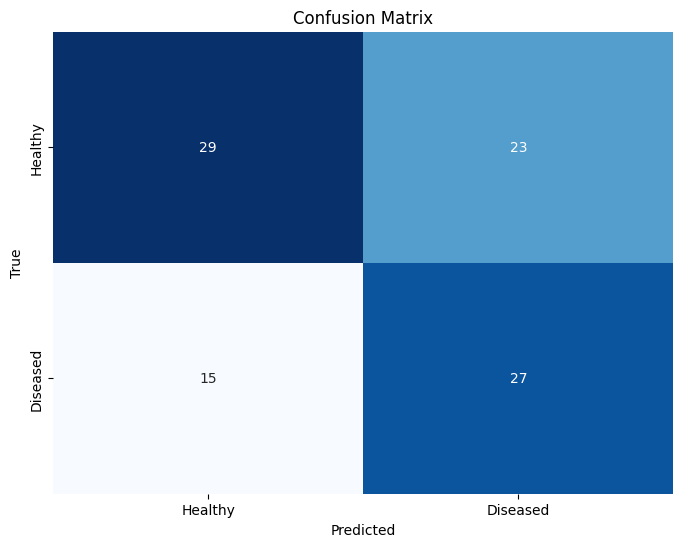

In [ ]:
y_pred = model.predict(X_test)

# Evaluate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()